
### DATA STORYTELLING PROJECT

FOOD PRODUCTION AND CONSUMPTION IN AFRICA (2004-2013)

The aim of this project is to tell a story of the food shortage problem in Africa by analysis and visualisations. 

The following are to be covered


*   Trends in food production and consumption over the years.
*   average and median food production, the outliers, quartiles and interquartiles ranges (boxplot)
*   A comparison between average food consumption and production for each year.





DATA

Three datasets were used in this project.

In [3]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go




In [4]:
#food production data
food_production = pd.read_csv('/content/Food Production Data.csv')
food_production

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [5]:
#food supply data
food_supply= pd.read_csv('/content/Africa food supply.csv')
food_supply

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [6]:
#Q1: Which country produced the highest amount of oats in 2010
oat_2010 = food_production[(food_production['Item'] == 'Oats')]
oatts_2010 = oat_2010[(oat_2010)['Year']== 2010]
oatts_2010

,Country,Item,Year,Value
46,Algeria,Oats,2010,88
6406,Ethiopia,Oats,2010,48
7746,Ghana,Oats,2010,0
9286,Kenya,Oats,2010,3
10026,Lesotho,Oats,2010,0
13186,Morocco,Oats,2010,37
17816,South Africa,Oats,2010,34
20056,Tunisia,Oats,2010,2
22516,Zimbabwe,Oats,2010,1


Algeria produced the highest amount of oats in 2010


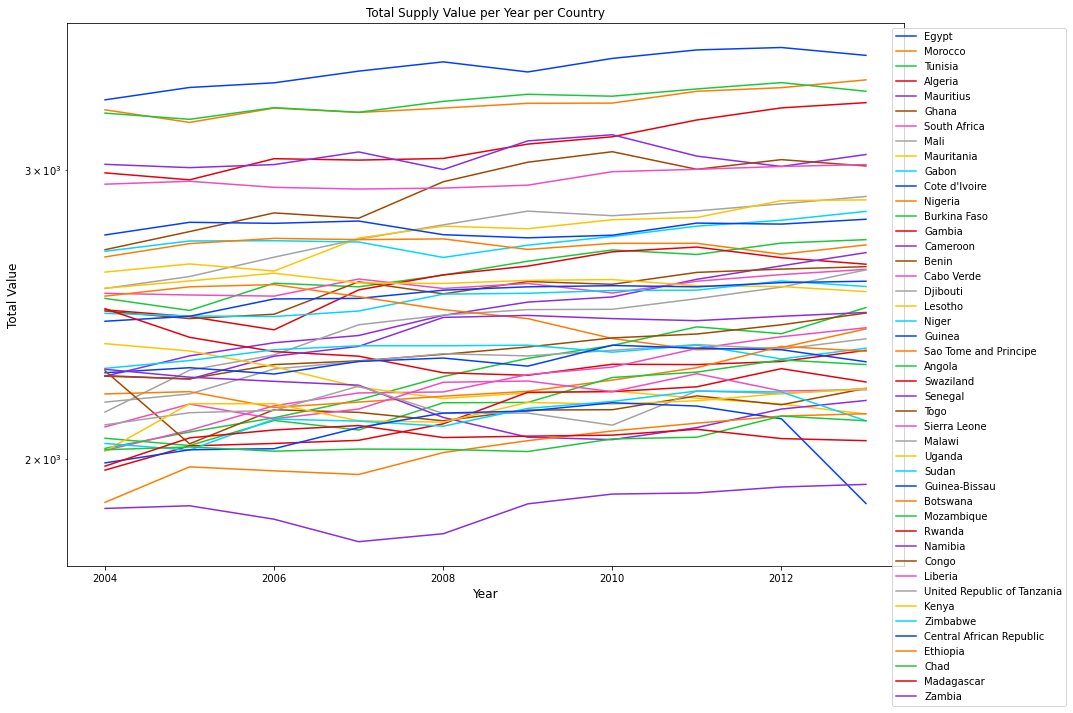

In [7]:
#Q2: which three countries had the lowest food supply betweenn 2004 and 2006
foodsupply_tot = pd.DataFrame(food_supply.groupby(['Country', 'Year'], as_index = False).sum())

# Sorting by total values supplied in descending order
foodsupply_grouped = foodsupply_tot.sort_values(by='Value', ascending=False)

# Visualising with a line chart the trend  from 2004 - 2013 of total items supplied to each country
plt.subplots(figsize=(15,10))
lineplt1 = sns.lineplot(x=foodsupply_grouped['Year'], y= foodsupply_grouped['Value'], hue=foodsupply_grouped['Country'], palette = 'bright', data=foodsupply_grouped, ci=None )
lineplt1.set_yscale('log')
lineplt1.legend(loc='upper right',bbox_to_anchor= (1.2, 1))

# Defining the title of the plot, xaxis and yaxis.
plt.title('Total Supply Value per Year per Country')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Value', fontsize = 12);


The 3 countries with the lowest food supply are Zmanbia, Ethopia and Central African Reoublic

In [8]:
food_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [9]:
food_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [48]:
#converting the year columns to date
food_supply['Year'] = food_supply['Year'].apply(lambda x: pd.to_datetime(str(x), format='%Y') 
food_production['Year'] = food_production['Year'].apply(lambda x: pd.to_datetime(str(x), format='%Y')

SyntaxError: ignored

In [10]:
#statistical summary of food production dataframe
food_production.describe(include='all')

,Country,Item,Year,Value
count,23110,23110,23110.000000,23110.000000
unique,45,94,NaN,NaN
top,United Republic of Tanzania,Milk - Excluding Butter,NaN,NaN
freq,790,450,NaN,NaN
mean,NaN,NaN,2008.498269,327.785201
std,NaN,NaN,2.871740,1607.940343
min,NaN,NaN,2004.000000,0.000000
25%,NaN,NaN,2006.000000,3.000000
50%,NaN,NaN,2008.000000,18.000000
75%,NaN,NaN,2011.000000,108.000000


In [11]:
#statistical summary of food supply dataframe
food_supply.describe(include='all')

,Country,Year,Value
count,450,450.000000,450.000000
unique,45,NaN,NaN
top,Algeria,NaN,NaN
freq,10,NaN,NaN
mean,NaN,2008.500000,2469.775556
std,NaN,2.875478,379.140143
min,NaN,2004.000000,1781.000000
25%,NaN,2006.000000,2174.000000
50%,NaN,2008.500000,2376.000000
75%,NaN,2011.000000,2681.750000


## EXPLORATORY DATA ANALYSIS

FOOD PRODUCTION

In [12]:
#creating a new dataframe called country production containing average production value for each country
country_prod= pd.DataFrame(food_production.groupby('Country')['Value'].sum()).reset_index(inplace=False) 

In [75]:
country_prod

,Country,Value
0,Algeria,188650
1,Angola,195499
2,Benin,88072
3,Botswana,4808
4,Burkina Faso,100129
5,Cabo Verde,1658
6,Cameroon,197670
7,Central African Republic,24921
8,Chad,45078
9,Congo,25791


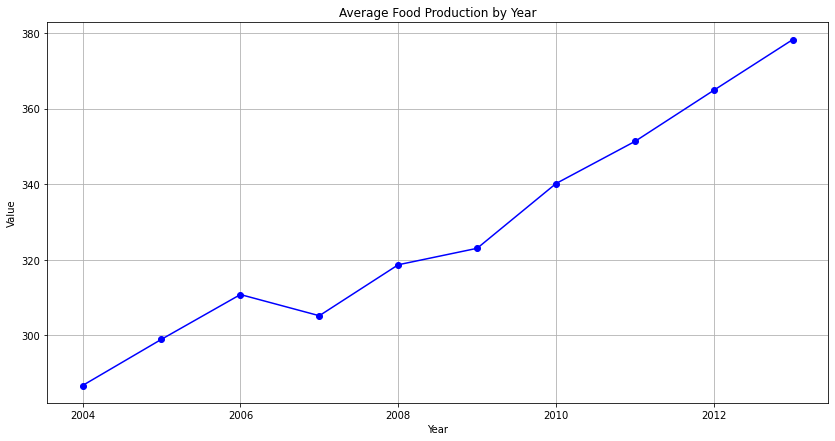

In [14]:
#plotting line chart to show trend of food production from 2004-2013
fig= plt.figure(figsize=(14, 7))
plt.plot(food_production.groupby('Year')['Value'].mean(), marker='o', color='blue')
plt.title('Average Food Production by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()
plt.show()
fig.savefig('Average Food Production by Year')

In [15]:
food_production_sorted_desc= food_production.sort_values('Value',ascending=False)


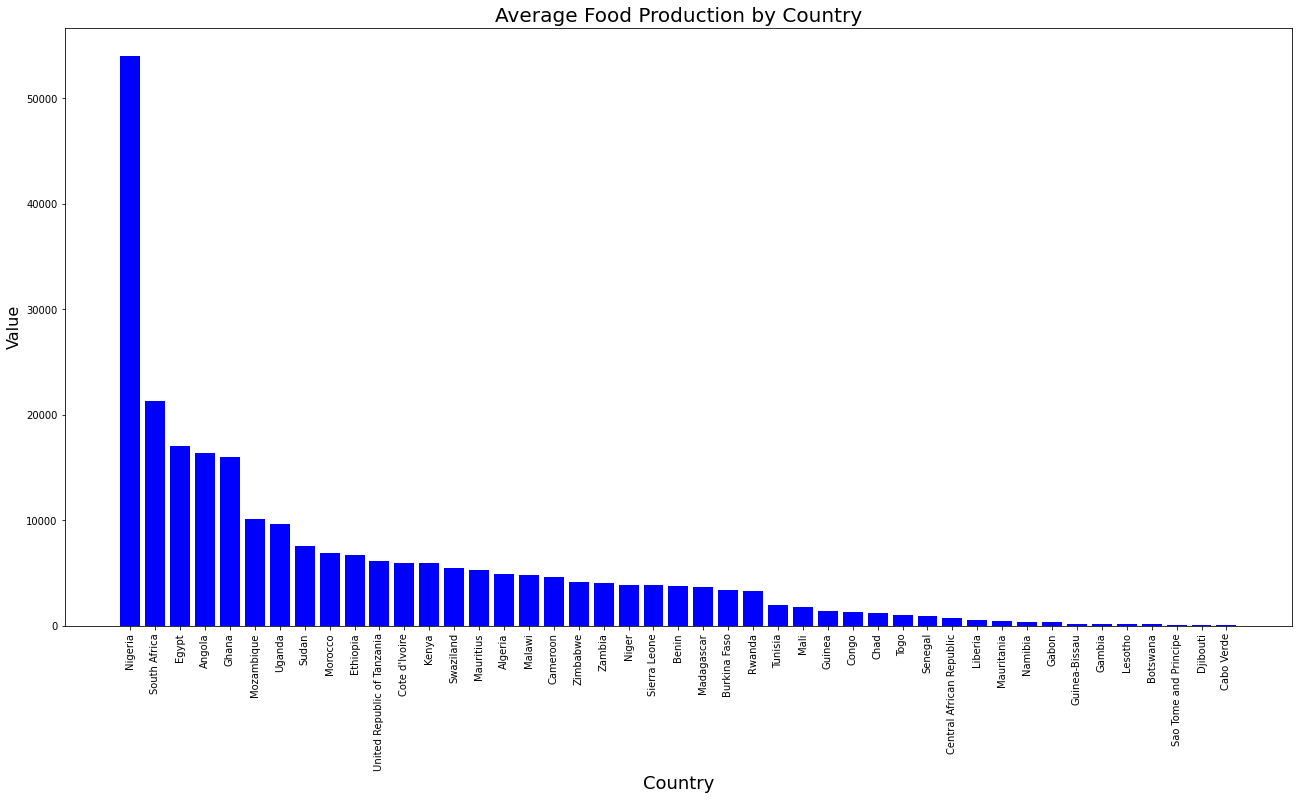

In [16]:
#bar chart showing production value by country
fig= plt.figure(figsize=(22, 11))
plt.bar(food_production_sorted_desc['Country'],food_production_sorted_desc['Value'],color='blue')
plt.title('Average Food Production by Country', fontsize= 20)
plt.xlabel('Country', fontsize= 18)
plt.ylabel('Value', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Average Food Production by Country')


From the barplot above, Nigeria is the highest producer of food, followed with a very huge gap by South Africa and Egypt

## Food items produced in Africa






In [13]:
# average supply value for each country
country_supply= pd.DataFrame(food_supply.groupby('Country')['Value'].sum()).reset_index(inplace=False)
country_supply

,Country,Value
0,Algeria,31118
1,Angola,22556
2,Benin,25378
3,Botswana,22263
4,Burkina Faso,26072
5,Cabo Verde,25514
6,Cameroon,24603
7,Central African Republic,20719
8,Chad,20511
9,Congo,21530


In [17]:
item= pd.DataFrame(food_production.groupby('Item')['Value'].mean()).reset_index(inplace=False)

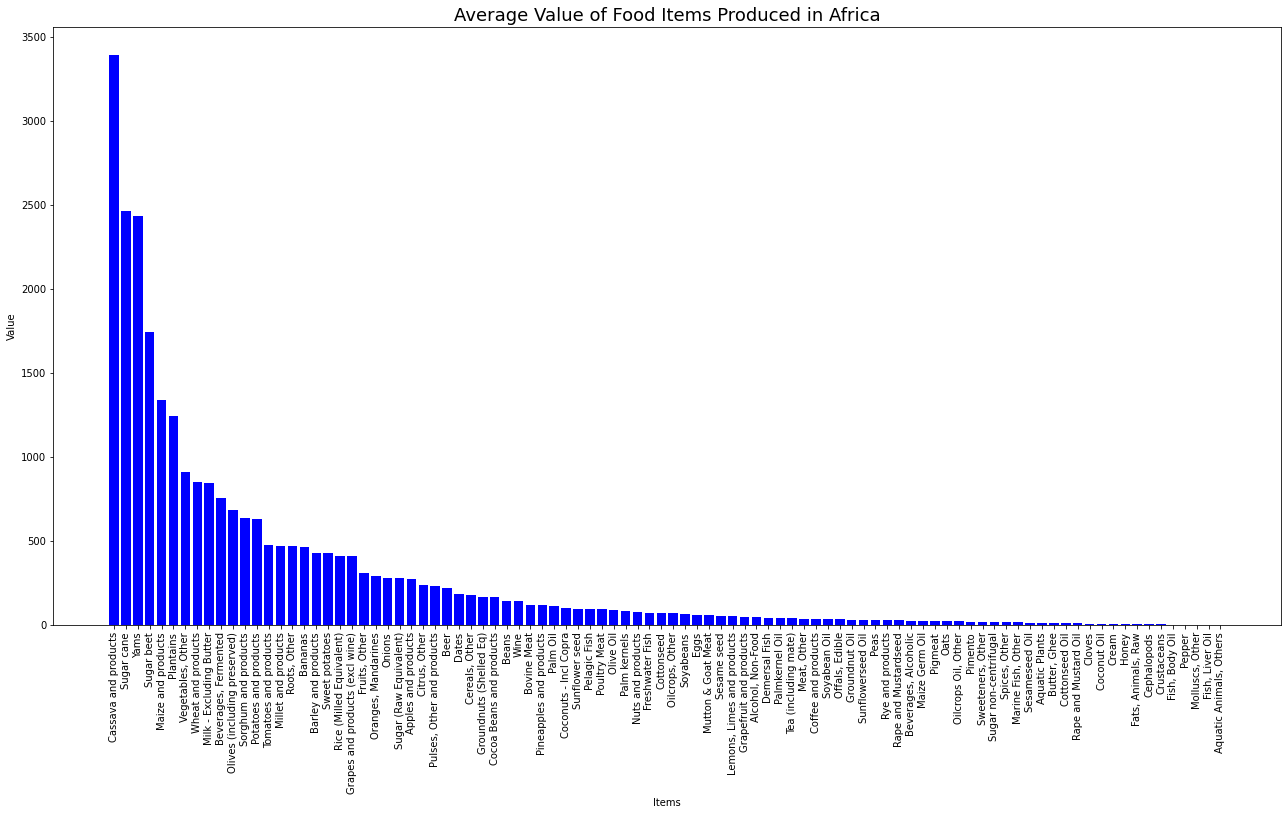

In [18]:
#Plotting the average value of food items on a bar chat
item_sorted= item.sort_values('Value', ascending=False)
fig= plt.figure(figsize=(22,11))
plt.bar('Item', 'Value',data=item_sorted, color = 'blue')
plt.xlabel("Items")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.title("Average Value of Food Items Produced in Africa", size=18)
plt.show()
fig.savefig('Food Produced in Africa.jpg')

Cassava is the item produced the most in Africa, followed by sugar cane and yam.

### FOOD SUPPLY

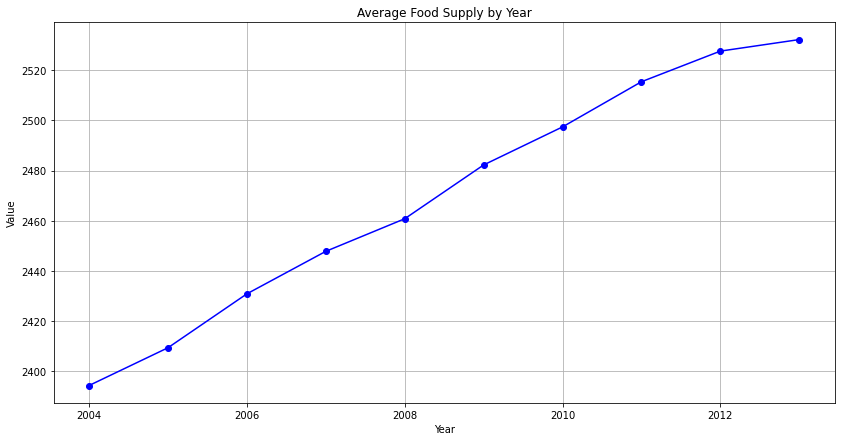

In [19]:
#plotting line chart to show trend of food suuply from 2004-2013
fig= plt.figure(figsize=(14, 7))
plt.plot(food_supply.groupby('Year')['Value'].mean(), marker='o', color='blue')
plt.title('Average Food Supply by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()
plt.show()
fig.savefig('Average food supply by year.jpg')

The trend of food supply is the same with that of food production. The both increase progressively

In [20]:
food_supply_sorted_desc= food_supply.sort_values('Value',ascending=False)
 

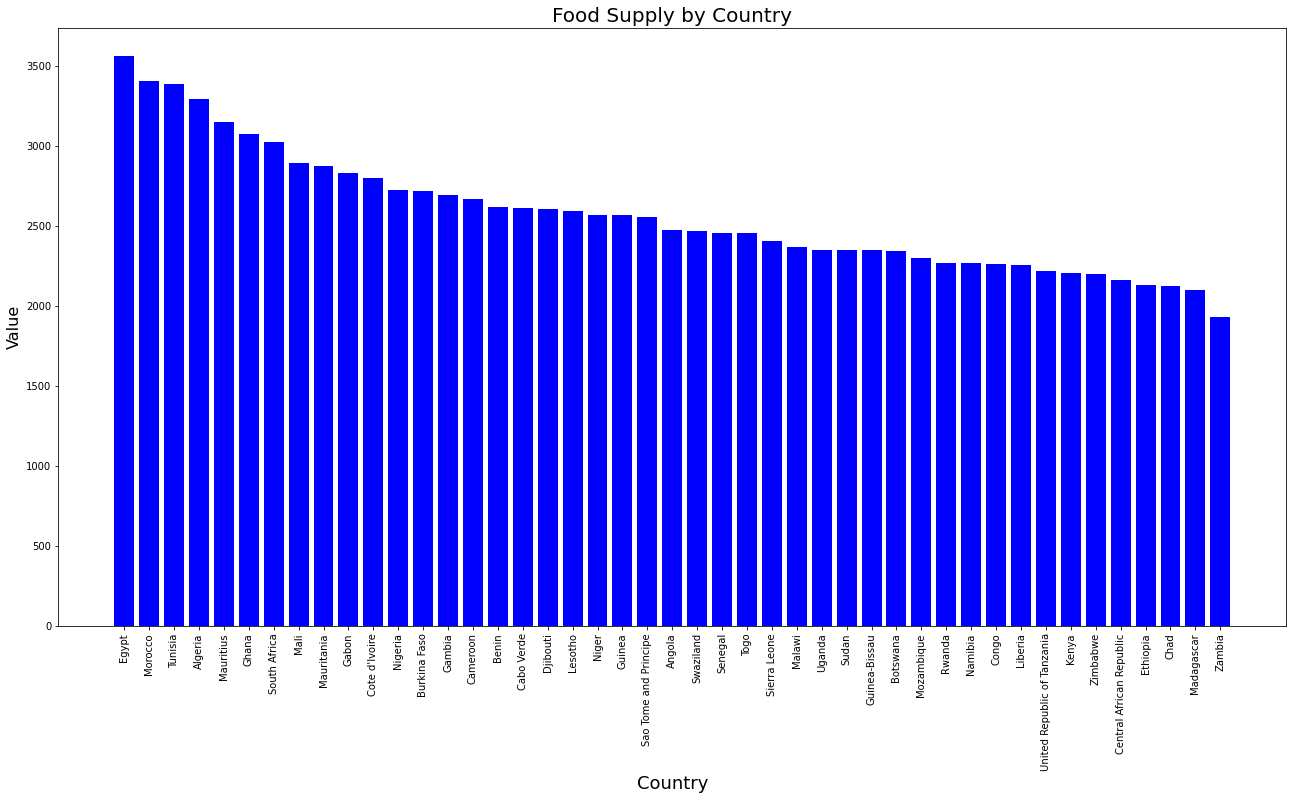

In [22]:
#bar chart showing supply value by country
fig= plt.figure(figsize=(22, 11))
plt.bar(food_supply_sorted_desc['Country'],food_supply_sorted_desc['Value'],color='blue')
plt.title('Food Supply by Country', fontsize= 20)
plt.xlabel('Country', fontsize= 18)
plt.ylabel('Value', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Average Food Supply by Country')


Egypt, Morocco and Tunisia are the top 3 countries with the highest food consumption

Lets compare the average quantity of food produced a year and quantity supplied/consumed a year

In [24]:
#average food production for each year
food_production_avg=pd.DataFrame(food_production.groupby('Year')['Value'].mean()).reset_index(inplace= False)
food_production_avg

,Year,Value
0,2004,286.767301
1,2005,298.986592
2,2006,310.814014
3,2007,305.215830
4,2008,318.686851
5,2009,323.040657
6,2010,340.166955
7,2011,351.303633
8,2012,364.831816
9,2013,378.227568


In [25]:
#average food supply for each year
food_supply_avg=pd.DataFrame(food_supply.groupby('Year')['Value'].mean()).reset_index(inplace= False)
food_supply_avg

,Year,Value
0,2004,2394.222222
1,2005,2409.288889
2,2006,2430.800000
3,2007,2447.755556
4,2008,2460.755556
5,2009,2482.222222
6,2010,2497.400000
7,2011,2515.422222
8,2012,2527.644444
9,2013,2532.244444


In [26]:
#merging of the two dataframes
prod_supp_avg_df = pd.merge(food_production_avg, food_supply_avg, on='Year')
prod_supp_avg_df

,Year,Value_x,Value_y
0,2004,286.767301,2394.222222
1,2005,298.986592,2409.288889
2,2006,310.814014,2430.800000
3,2007,305.215830,2447.755556
4,2008,318.686851,2460.755556
5,2009,323.040657,2482.222222
6,2010,340.166955,2497.400000
7,2011,351.303633,2515.422222
8,2012,364.831816,2527.644444
9,2013,378.227568,2532.244444


In [27]:
#renaming the columns 
prod_supp_avg_df.rename(columns= {'Value_x':'avg_food_produced', 'Value_y':'avg_food_supplied'}, inplace = True)

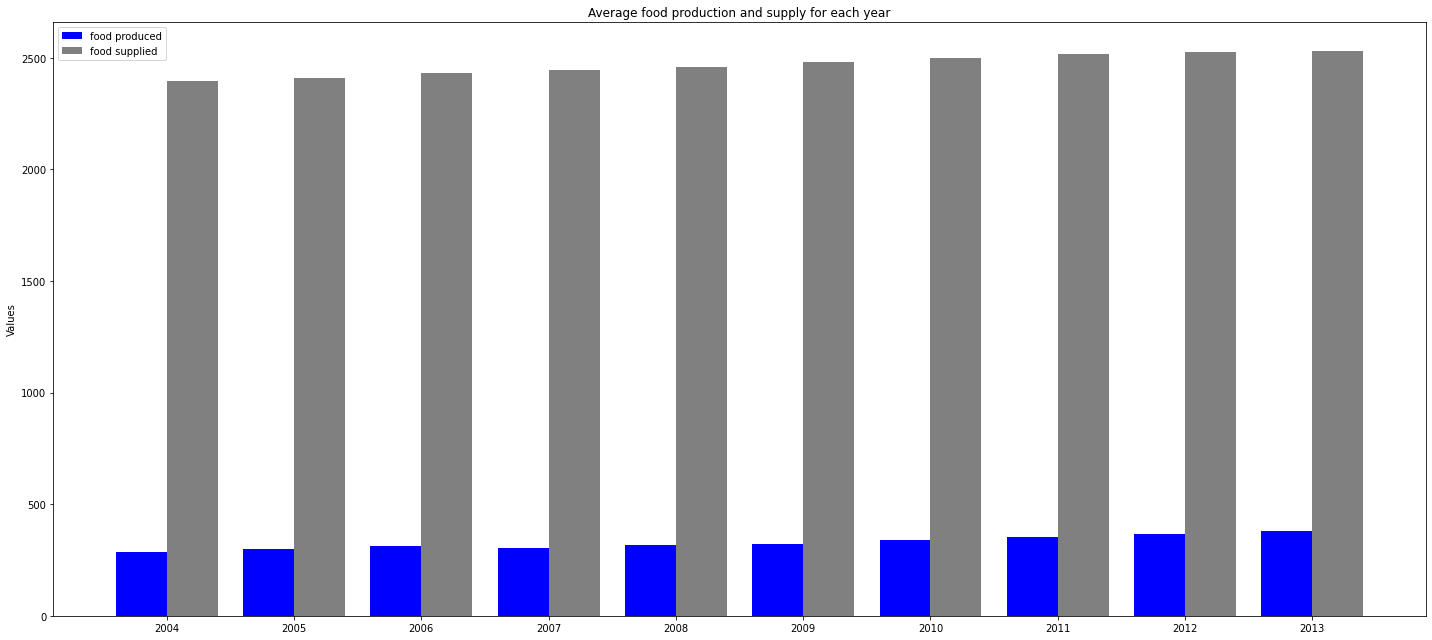

In [28]:
fig= plt.figure(figsize=(20,9))
x = np.arange(len(prod_supp_avg_df['Year']))  # the year locations
width = 0.40  # the width of the bars

ax = fig.add_subplot()
rects1 = ax.bar(x - width/2, prod_supp_avg_df['avg_food_produced'], width, label='food produced', color='blue')
rects2 = ax.bar(x + width/2, prod_supp_avg_df['avg_food_supplied'], width, label='food supplied', color='gray')

ax.set_ylabel('Values')
ax.set_title('Average food production and supply for each year')
ax.set_xticks(x)
ax.set_xticklabels(prod_supp_avg_df['Year'])
ax.legend()



fig.tight_layout()

plt.show()
fig.savefig('Food Production vs Supply.jpg')

From the above figure, food consumption is higher than food production in Africa over the years. The question is 'How do African countries  source our food'

Lets compare food consumption to food production

In [30]:
#scraping population data from wikipedia
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_African_countries_by_population')[1]
df

,Countries(or dependent territory),Officialfigure(whereavailable),Date oflast figure,Source
0,Nigeria,218056384,2022,the world[3]
1,Ethiopia,128004992,2018,UN population projections[4][5]
2,Egypt,99281168,"December 8, 2020",National population clock
3,Democratic Republic of the Congo,94420023,"July 1, 2020",National annual projection
4,Tanzania,62757193,2020,Worldometers
5,South Africa,60591903,2021,Official estimate
6,Kenya,55845793,2019,Worldometers
7,Uganda,48325541,2021,National annual projection
8,Sudan,45647651,"January 25, 2020",Official population clock
9,Algeria,45225962,2021,Official estimate


In [31]:
#cleaning the dataset
pop_df = df[['Countries(or dependent territory)', 'Officialfigure(whereavailable)']]
pop_df.rename(columns = {'Countries(or dependent territory)':'Country',  'Officialfigure(whereavailable)':'Population'}, inplace= 'True')
pop_df

                              

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Population
0,Nigeria,218056384
1,Ethiopia,128004992
2,Egypt,99281168
3,Democratic Republic of the Congo,94420023
4,Tanzania,62757193
5,South Africa,60591903
6,Kenya,55845793
7,Uganda,48325541
8,Sudan,45647651
9,Algeria,45225962


In [32]:
#merging the data set with average food supply data 
main_df= pd.merge(country_supply, pop_df, on= 'Country')
main_df

,Country,Value,Population
0,Algeria,31118,45225962
1,Angola,22556,32097671
2,Benin,25378,12506347
3,Botswana,22263,2410338
4,Burkina Faso,26072,18450494
5,Cameroon,24603,28524175
6,Central African Republic,20719,3859139
7,Chad,20511,16818391
8,Djibouti,24165,976107
9,Egypt,34580,99281168


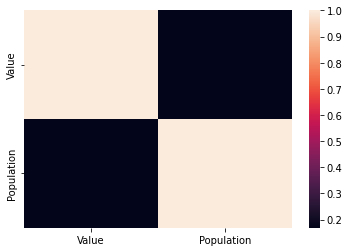

In [33]:
#correlation heatmap of Food Supply
sns.heatmap(main_df.corr())
plt.show()

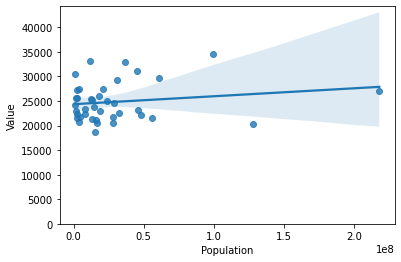

In [35]:
#checking if there is any relationship between Food supply and Population
sns.regplot(x= 'Population', y= 'Value', data=main_df)
plt.ylim(0,)
plt.savefig('regression plot for food supply.png')

In [37]:
#merging the data set with food production data 
main_dff= pd.merge(country_prod, pop_df, on= 'Country')
main_dff

,Country,Value,Population
0,Algeria,188650,45225962
1,Angola,195499,32097671
2,Benin,88072,12506347
3,Botswana,4808,2410338
4,Burkina Faso,100129,18450494
5,Cameroon,197670,28524175
6,Central African Republic,24921,3859139
7,Chad,45078,16818391
8,Djibouti,666,976107
9,Egypt,877498,99281168


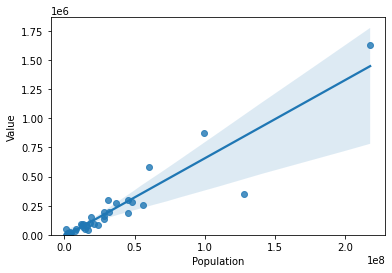

In [38]:
#checking if there is any relationship between Population and Food production
sns.regplot(x= 'Population', y= 'Value', data=main_dff)
plt.ylim(0,)
plt.savefig('regression plot for food production.png')

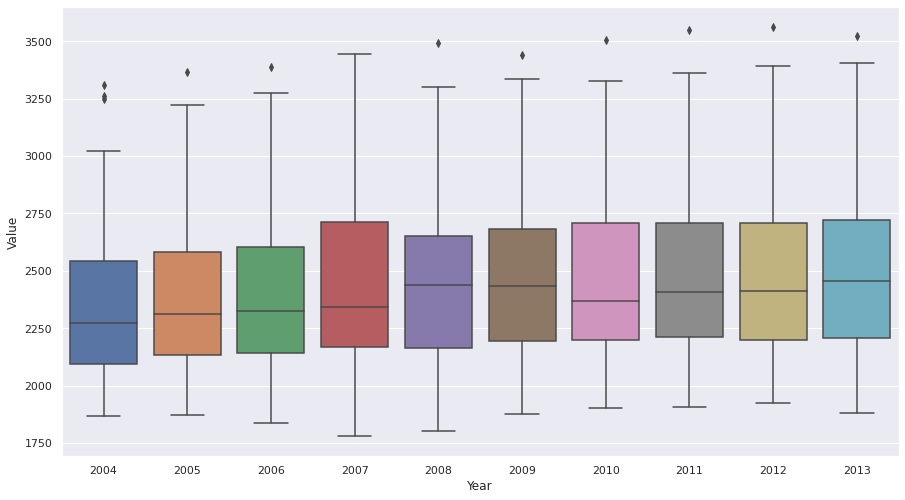

In [27]:
#box plot for food supply dataset
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,8.27)}) 
sns_plot = sns.boxplot(x = 'Year', y = 'Value', data = food_supply)
fig = sns_plot.get_figure()
plt.show()
fig.savefig('supply_outliers.jpg')


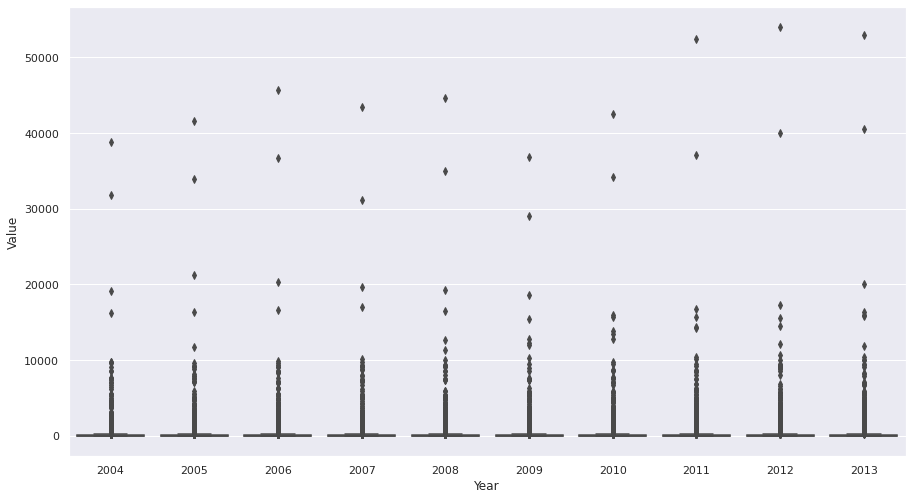

In [44]:
#box plot for food production dataset
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,8.27)}) 
sns_plot = sns.boxplot(x = 'Year', y = 'Value', data = food_production)
fig = sns_plot.get_figure()
plt.show()
fig.savefig('produce_outliers.jpg')


From the above figure, there are many outliers in the data

In [41]:
#25th percentile Q1
Q1= np.percentile(food_production['Value'],25)
print(f"Q1 value for food production data is {Q1}")

#75th percentile Q3
Q3= np.percentile(food_production['Value'],75)
print(f" Q3 value for food production data is {Q3}")

#Calculating the IQR
IQR= Q3-Q1
print(f"IQR for food production data is {IQR}")

#calculating lower bound and upper bound values
lower_bound= Q1 - (1.5 * IQR)
print(f"Lower bound value for food production data is {lower_bound}")

upper_bound= Q3 + (1.5 * IQR)
print(f"Upper bound value for food production data is {upper_bound}")

Q1 value for food production data is 3.0
 Q3 value for food production data is 108.0
IQR for food production data is 105.0
Lower bound value for food production data is -154.5
Upper bound value for food production data is 265.5
